**Importance of Feature Engineering**

Feature engineering can significantly influence model performance. By refining features, we can:

*Improve accuracy*: Choosing the right features helps the model learn better, leading to more accurate predictions.

*Reduce overfitting*: Using fewer, more important features helps the model avoid memorizing the data and perform better on new data.

*Boost interpretability*: Well-chosen features make it easier to understand how the model makes its predictions.

*Enhance efficiency*: Focusing on key features speeds up the model’s training and prediction process, saving time and resources.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Feature** **Creation**

Generating new features from domain knowledge or by observing patterns in the data.

In [3]:
data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
df = pd.DataFrame(data)
df

,Employee id,Gender,Remarks
0,10,M,Good
1,20,F,Nice
2,15,F,Good
3,25,M,Great
4,30,F,Nice


In [4]:
#Pandas encoding
# Use pd.get_dummies() to one-hot encode the categorical columns
#drop_first drops Gender_F
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)
df_pandas_encoded

,Employee id,Gender_M,Remarks_Great,Remarks_Nice
0,10,True,False,False
1,20,False,False,True
2,15,False,False,False
3,25,True,True,False
4,30,False,False,True


In [5]:
#Scikit Learn Library
# One Hot Encoder - a method for converting categorical variables into a binary format.
# It creates new columns for each category where 1 means the category is present and 0 means it is not.
from sklearn.preprocessing import OneHotEncoder

#create one hot encoder
#sparse_output - True for sparse matrix, False for one-hot encoded columns

def Encoding(data, columns):
  encoder = OneHotEncoder(sparse_output=False)
  one_hot_encoded = encoder.fit_transform(data[columns])
  one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns))
  encoded = pd.concat([data, one_hot_df], axis=1)
  encoded = encoded.drop(columns, axis=1)
  return encoded

In [6]:
#selects only the columns with categorical data (data type object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = Encoding(df, categorical_columns)
df_encoded

,Employee id,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,10,0.0,1.0,1.0,0.0,0.0
1,20,1.0,0.0,0.0,0.0,1.0
2,15,1.0,0.0,1.0,0.0,0.0
3,25,0.0,1.0,0.0,1.0,0.0
4,30,1.0,0.0,0.0,0.0,1.0


**Feature Transformation**

The transformers are the type of functions that are applied to data that is not normally distributed, and once applied there is a high of getting normally distributed data.

In [7]:
freq_data = {'Value': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.2, 1.8, 2, 2.1, 2.5, 3, 3.2, 3.8, 3.9, 4, 4.1, 4.2, 4.4, 4.7, 4.8, 5],
        'Frequency': [250, 200, 130, 100, 80, 50, 45, 35, 40, 35, 30, 25, 20, 15, 15, 5, 4, 3, 1, 1, 1, 1, 2]
        }
freq_df = pd.DataFrame(freq_data)
freq_df

,Value,Frequency
0,0.0,250
1,0.1,200
2,0.2,130
3,0.3,100
4,0.4,80
5,0.5,50
6,1.0,45
7,1.2,35
8,1.8,40
9,2.0,35


Text(0, 0.5, 'Frequency')

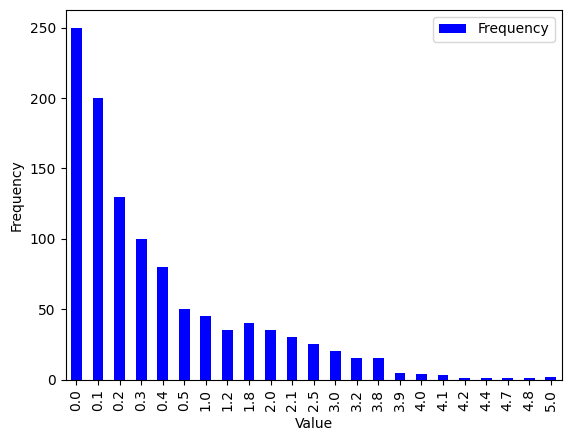

In [8]:
#right skewd data
ax = freq_df.plot(kind='bar',
             x='Value',
             y='Frequency',
             color='blue')

# Customize axis labels (optional, but can be added via 'ax' for more control)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

(array([[23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [11.,  6.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.]]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 2 BarContainer objects>)

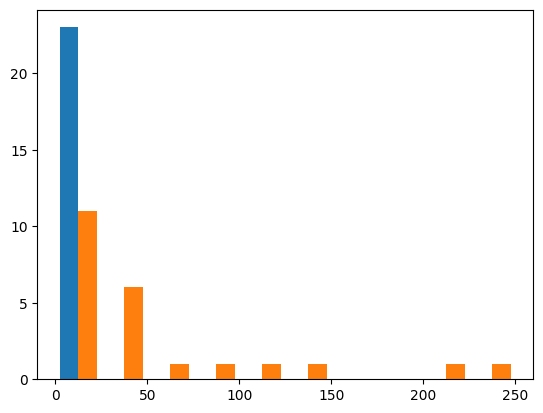

In [9]:
plt.hist(freq_df, bins=10)

In [10]:
#log transform
#Use when data is skewed or has big differences in size

from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(func=np.log1p)
log_data = log_transform.fit_transform(freq_df)
log_data


,Value,Frequency
0,0.000000,5.525453
1,0.095310,5.303305
2,0.182322,4.875197
3,0.262364,4.615121
4,0.336472,4.394449
5,0.405465,3.931826
6,0.693147,3.828641
7,0.788457,3.583519
8,1.029619,3.713572
9,1.098612,3.583519


(array([[6., 4., 9., 4., 0., 0., 0., 0., 0., 0.],
        [0., 5., 2., 1., 0., 4., 5., 2., 2., 2.]]),
 array([0.        , 0.55254529, 1.10509059, 1.65763588, 2.21018118,
        2.76272647, 3.31527176, 3.86781706, 4.42036235, 4.97290765,
        5.52545294]),
 <a list of 2 BarContainer objects>)

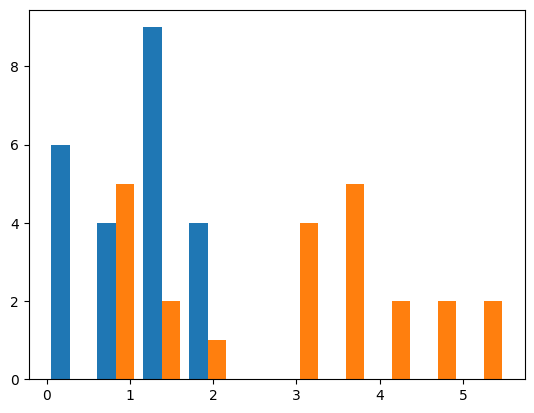

In [11]:
#more symetrical data, normal distribution
plt.hist(log_data, bins=10)

In [12]:
#square root transform
#Use when working with count data (like number of events or defects)

square_data = np.sqrt(freq_df)
square_data

,Value,Frequency
0,0.000000,15.811388
1,0.316228,14.142136
2,0.447214,11.401754
3,0.547723,10.000000
4,0.632456,8.944272
5,0.707107,7.071068
6,1.000000,6.708204
7,1.095445,5.916080
8,1.341641,6.324555
9,1.414214,5.916080


(array([[11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 5.,  3.,  3.,  4.,  3.,  1.,  1.,  1.,  1.,  1.]]),
 array([ 0.        ,  1.58113883,  3.16227766,  4.74341649,  6.32455532,
         7.90569415,  9.48683298, 11.06797181, 12.64911064, 14.23024947,
        15.8113883 ]),
 <a list of 2 BarContainer objects>)

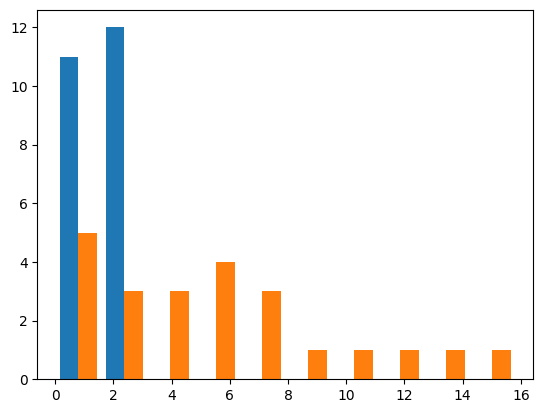

In [13]:
#more symetrical data, normal distribution
plt.hist(square_data, bins=10)

In [14]:
#skweness
#Skewness drops to closer to 0
freq_df.Frequency.skew(), log_data.Frequency.skew(), square_data.Frequency.skew()

(np.float64(2.0578615987662086),
 np.float64(-0.11298074145317887),
 np.float64(0.9983533201028121))

In [15]:
#Mean and median are closer together
freq_df.Frequency.mean() - freq_df.Frequency.median(), log_data.Frequency.mean() - log_data.Frequency.median(), square_data.Frequency.mean() - square_data.Frequency.median()


(np.float64(22.304347826086953),
 np.float64(-0.33222357310256),
 np.float64(0.4918781428857413))

**Feature Extraction**

Transforming raw data into a simplified and informative set of features or attributes.

Transforming the original features into a new set of features.

Covariance - measures how two random variables change together.

It is calculated by averaging the product of their deviations from their means.

A positive value means they move in the same direction, while a negative value means they move in opposite directions.


Correlation is a standardized measure of the strength and direction of the linear relationship between two variables.

It is derived from covariance and ranges between -1 and 1.

Unlike covariance, which only indicates the direction of the relationship, correlation provides a standardized measure.

1.   Positive Correlation (close to +1): As one variable increases, the other variable also tends to increase.

1.   Negative Correlation (close to -1): As one variable increases, the other variable tends to decrease.
2.   Zero Correlation: There is no linear relationship between the variables.





Interpret the following covariance matrix:

          X         Y           Z

    X     60        32          -4

    Y     32        30          0

    Z     -4        0           80
     






1.   The diagonal elements 60, 30, and 80 indicate the variance in data sets X, Y, and Z respectively. Y shows the lowest variance whereas Z displays the highest variance.

1.   The covariance for X and Y is 32. As this is a positive number it means that when X increases (or decreases) Y also increases (or decreases)

2.   The covariance for X and Z is -4. As it is a negative number it implies that when X increases Z decreases and vice-versa.

2.   The covariance for Y and Z is 0. This means that there is no predictable relationship between the two data sets.



In [16]:
#Correlation Matrix

#finding correlation between two variables
#the value of the correlation is near to 1, the positive correlation is reflected
y = pd.Series([1, 2, 3, 4, 3, 5, 4])
x = pd.Series([1, 2, 3, 4, 5, 6, 7])
correlation = y.corr(x)
correlation


np.float64(0.8603090020146067)

Text(0, 0.5, 'y axis')

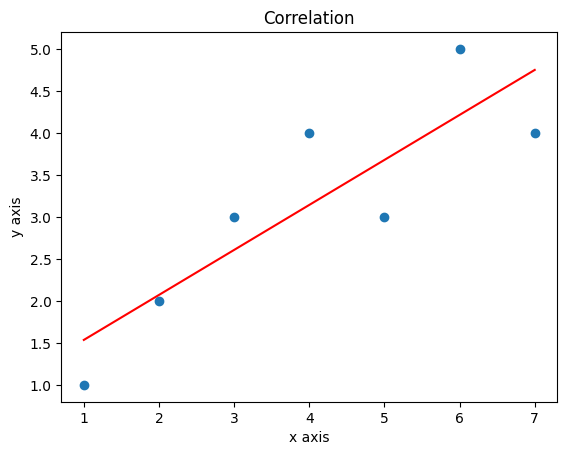

In [17]:
#Plotting the graph using scatter plots.
#A scatter plot is a diagram where each value in the data set is represented by a dot. Also, it shows a relationship between two variables.
plt.scatter(x, y)

#fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

#labels
plt.title('Correlation')
plt.xlabel('x axis')
plt.ylabel('y axis')

In [18]:
#Plot using heatmaps.
#Heatmaps tells the correlation of one feature(variable) to every other feature(variable).
#A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

import seaborn as sns

#Loading dataset
flights = sns.load_dataset("flights")
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [19]:
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [20]:
flights.drop(columns="month", inplace = True)
flights

,year,passengers
0,1949,112
1,1949,118
2,1949,132
3,1949,129
4,1949,121
...,...,...
139,1960,606
140,1960,508
141,1960,461
142,1960,390


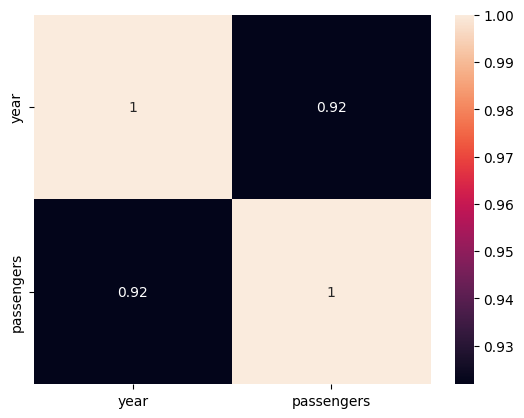

In [21]:
#plotting the heatmap for correlation
ax = sns.heatmap(flights.corr(), annot=True)

**Feature Selection**

Selecting a subset of relevant features from the original set.

Reduce dimensionality


In [22]:
trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/sample_submission.csv')
trainData.head(5)

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [23]:
#drop unused columns
trainData.drop(columns=['id','target'], inplace = True)
trainData.head(5)

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [24]:
#fill up null
trainData.fillna(method='ffill')
#trainData.fillna(0)
trainData

/tmp/ipython-input-687583378.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trainData.fillna(method='ffill')


,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,0.200,0.650,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,1.027,1.848,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,0.020,0.650,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,0.270,1.730,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,0.435,0.650,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,0.565,3.960,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,2.200,1.640,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,0.400,1.848,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,0.200,1.160,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


<Axes: >

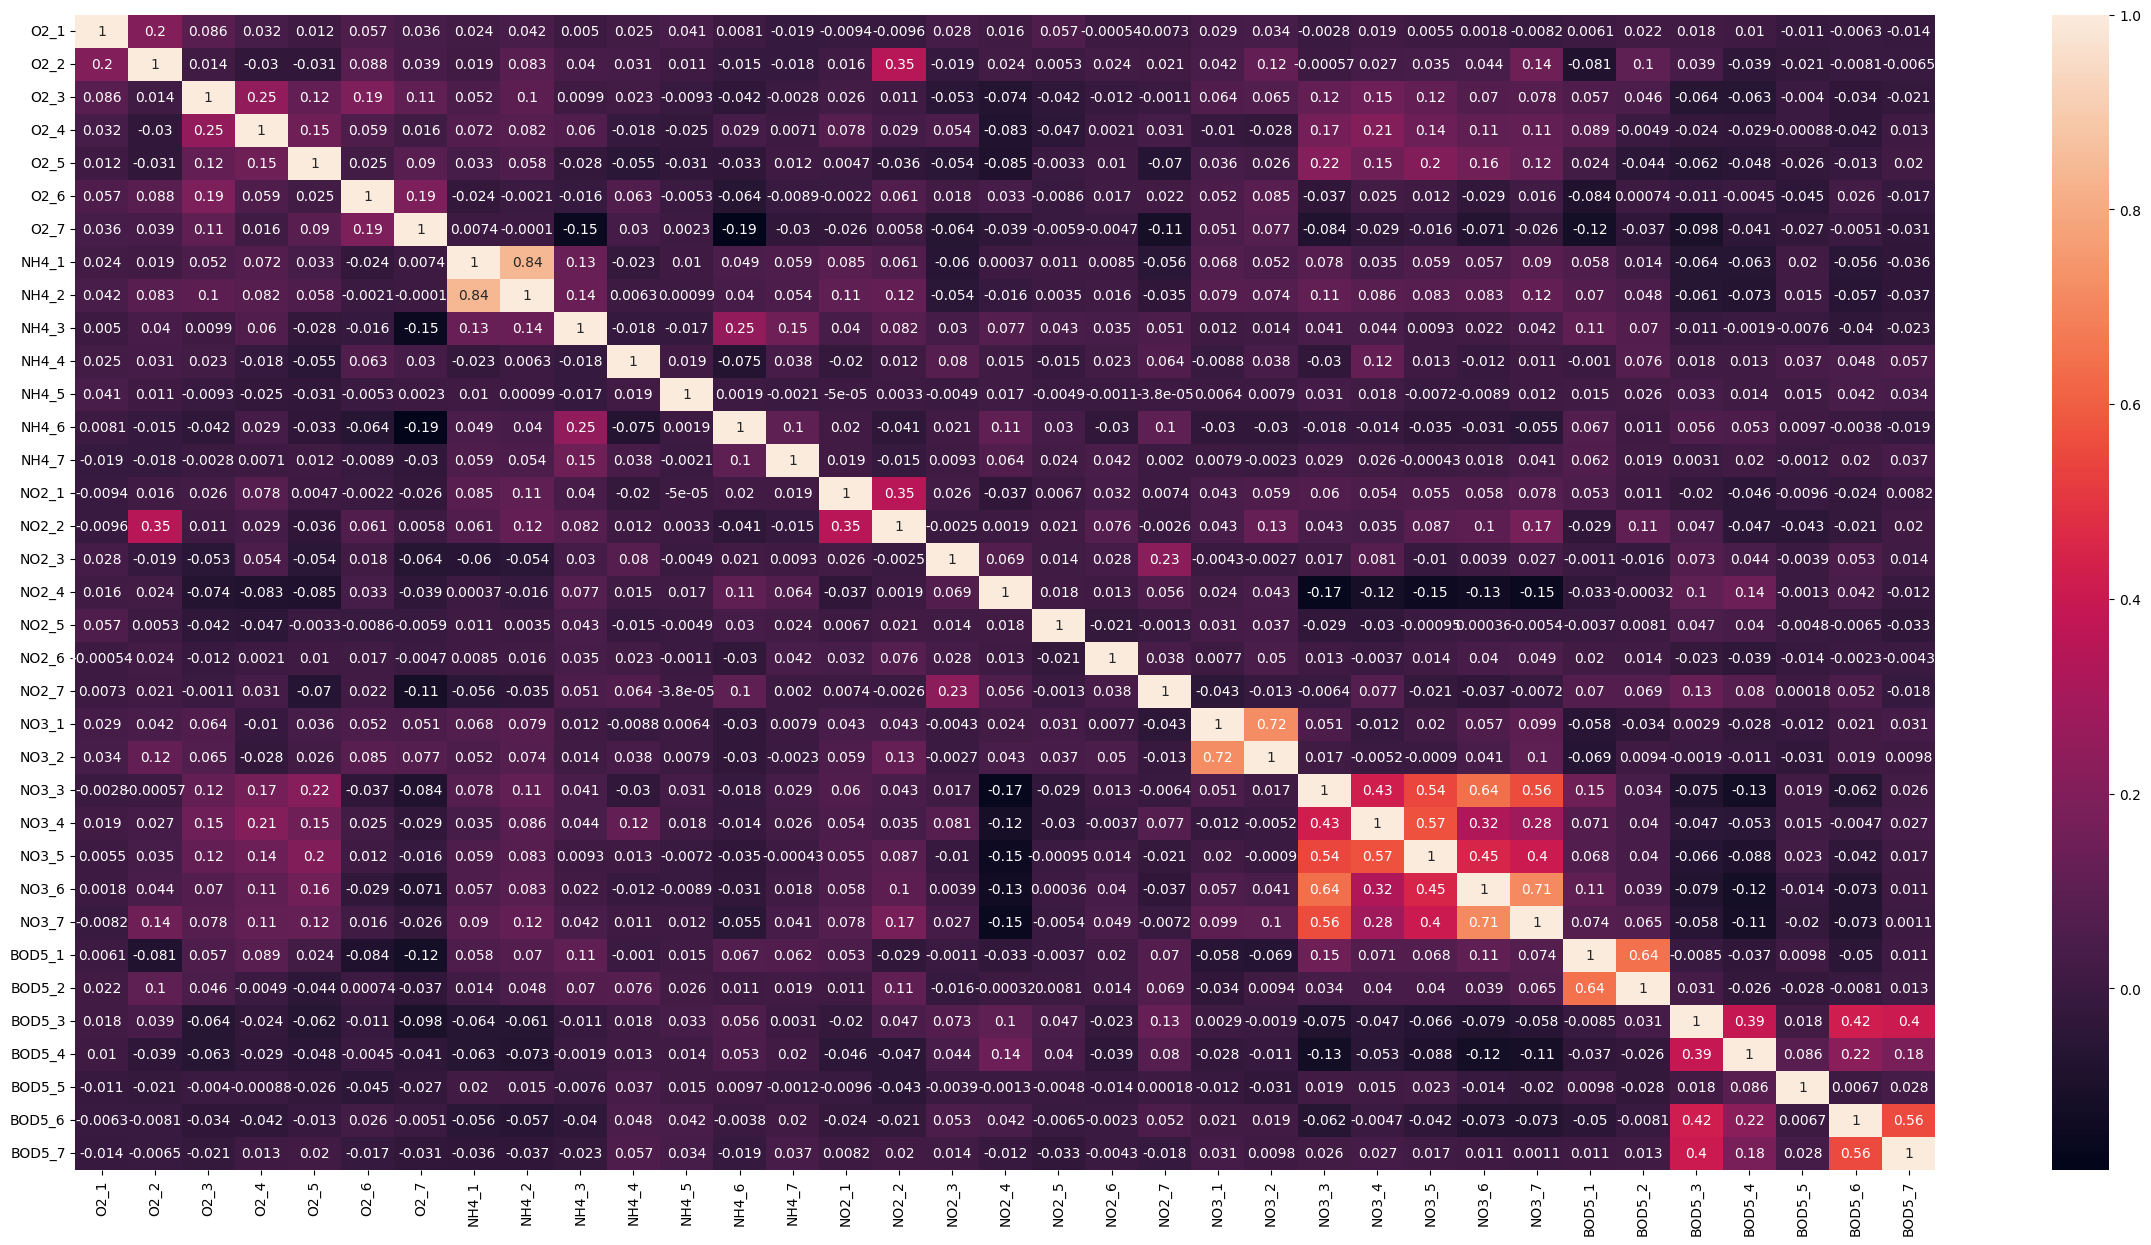

In [25]:
#The correlation measures the strength of the linear relationship between two variables.
#It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

trainCorr = trainData.corr()
plt.figure(figsize=(30,15))
sns.heatmap(trainCorr, annot=True)

In [26]:
#remove features with low correlation with target label
#before dropping 'target'

#threshold = 0.05
#corr=abs(trainCorr['target'])
#result = corr[corr>threshold]
#result.sort_values(ascending=False)

In [27]:
#Discover features with high correlation, and keep and drop the other. Same process is followed until last variable.

columns = trainData.columns.tolist()
columns

['O2_1',
 'O2_2',
 'O2_3',
 'O2_4',
 'O2_5',
 'O2_6',
 'O2_7',
 'NH4_1',
 'NH4_2',
 'NH4_3',
 'NH4_4',
 'NH4_5',
 'NH4_6',
 'NH4_7',
 'NO2_1',
 'NO2_2',
 'NO2_3',
 'NO2_4',
 'NO2_5',
 'NO2_6',
 'NO2_7',
 'NO3_1',
 'NO3_2',
 'NO3_3',
 'NO3_4',
 'NO3_5',
 'NO3_6',
 'NO3_7',
 'BOD5_1',
 'BOD5_2',
 'BOD5_3',
 'BOD5_4',
 'BOD5_5',
 'BOD5_6',
 'BOD5_7']

In [28]:
c_1 = trainData.O2_1.corr(trainData.O2_2)
c_1

np.float64(0.2047541661748549)

In [29]:
c_2 = trainData[columns[0]].corr(trainData[columns[1]])
c_2


np.float64(0.2047541661748549)

In [30]:
highCorrFeature = []
for i in range(5,len(columns)):
    if columns[i] in highCorrFeature:
        continue
    for j in range(i,len(columns)):
        if columns[j] in highCorrFeature:
            continue
        if i != j:
            c = trainData[columns[i]].corr(trainData[columns[j]])
            if c > 0.5:
                print(f"{columns[i]} and {columns[j]} has high correlation {c}")
                highCorrFeature.append(columns[j])



NH4_1 and NH4_2 has high correlation 0.8414882929192141
NO3_1 and NO3_2 has high correlation 0.7196981136988064
NO3_3 and NO3_5 has high correlation 0.5421141239762864
NO3_3 and NO3_6 has high correlation 0.6412964900302395
NO3_3 and NO3_7 has high correlation 0.5560658153589095
BOD5_1 and BOD5_2 has high correlation 0.6448950380251331
BOD5_6 and BOD5_7 has high correlation 0.5551490469957161


In [31]:
print(f"\nSize of original data {trainData.shape[1]}, \
number of high correlation features {len(highCorrFeature)}")


Size of original data 35, number of high correlation features 7


In [32]:
#select features with low correlation
x = trainData.drop(columns = highCorrFeature)
print("Selected features: ", x.columns.tolist())

Selected features:  ['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7', 'NH4_1', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_3', 'NO3_4', 'BOD5_1', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6']


**Feature Scaling**

Enhances accuracy and predictive power by presenting features in comparable scales.

Scales values between -1 and 1.

Sensitive to outliers, making it less suitable for noisy datasets.

In [33]:
df_housing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/Housing.csv')

#select numeric type columns
df_housing = df_housing.select_dtypes(include=np.number)

df_housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [35]:
#Absolute Maximum Scaling

max_abs = np.max(np.abs(df_housing), axis=0)
scaled_abs = df_housing / max_abs
scaled_abs.head()

,price,area,bedrooms,bathrooms,stories,parking
0,1.000000,0.458025,0.666667,0.50,0.75,0.666667
1,0.921053,0.553086,0.666667,1.00,1.00,1.000000
2,0.921053,0.614815,0.500000,0.50,0.50,0.666667
3,0.918421,0.462963,0.666667,0.50,0.50,1.000000
4,0.857895,0.458025,0.666667,0.25,0.50,0.666667


In [37]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_housing)
scaled_min_max = pd.DataFrame(scaled_data, columns=df_housing.columns)

scaled_min_max.head()


,price,area,bedrooms,bathrooms,stories,parking
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667
